In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
import pickle

In [2]:
pd.read_excel("data/pisos_analis_data_sucio.xlsx")

,Comuna,m2_totales,Habitaciones,Banos,Estacionamientos,Publi,Precio,UF,Poblacion total 2020,Superficie de Área Verde m²,...,Quinta Normal,Recoleta,Renca,San Bernardo,San Joaquín,San Miguel,San Ramón,Santiago,Vitacura,Ñuñoa
0,San Miguel,49,2,1,0,19/12/2022,99245550,2850,107828,212503.55,...,0,0,0,0,0,1,0,0,0,0
1,San Miguel,48,2,1,1,16/12/2022,100000000,2871,107828,212503.55,...,0,0,0,0,0,1,0,0,0,0
2,San Miguel,36,1,1,1,12/12/2022,88798650,2550,107828,212503.55,...,0,0,0,0,0,1,0,0,0,0
3,San Miguel,50,3,1,1,06/12/2022,73824760,2120,107828,212503.55,...,0,0,0,0,0,1,0,0,0,0
4,San Miguel,59,2,1,1,06/11/2022,107603070,3090,107828,212503.55,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9621,Buin,160,3,2,4,14/12/2022,233314100,6700,82267,603984.88,...,0,0,0,0,0,0,0,0,0,0
9622,Buin,160,3,2,4,14/12/2022,233314100,6700,82267,603984.88,...,0,0,0,0,0,0,0,0,0,0
9623,Buin,110,3,3,1,13/12/2022,261172500,7500,82267,603984.88,...,0,0,0,0,0,0,0,0,0,0
9624,Padre Hurtado,142,3,3,2,08/12/2022,177597300,5100,54922,393787.75,...,0,0,0,0,0,0,0,0,0,0


In [3]:
pisos=pd.read_excel("data/pisos_analis_data_sucio.xlsx")

# IMPLEMENTACION DE MODELOS DE REGRESION

## Definición de variables

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [5]:
X= pisos.drop(["Comuna",'Publi','Precio', 'UF'], axis=1)
y= pisos["UF"]

seed=12

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = seed)

In [7]:
print("Total features shape:", X.shape)
print("Train features shape:", X_train.shape)
print("Train target shape:", y_train.shape)
print("Test features shape:", X_test.shape)
print("Test target shape:", y_test.shape)

Total features shape: (9626, 83)
Train features shape: (7219, 83)
Train target shape: (7219,)
Test features shape: (2407, 83)
Test target shape: (2407,)


### 1. Linear Regression

In [8]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [9]:
print("Score train :", metrics.r2_score(y_train, lr.predict(X_train)))
print("Score test:", metrics.r2_score(y_test, lr.predict(X_test)))
acc1 = metrics.r2_score(y_test, lr.predict(X_test))

Score train : 0.003560928871765845
Score test: -0.00428037120311342


### 2. Decision Trees

In [10]:
from sklearn.tree import DecisionTreeRegressor
dt= DecisionTreeRegressor(max_depth= 5)
dt.fit(X_train, y_train)

print("Score train :", metrics.r2_score(y_train, dt.predict(X_train)))
print("Score test:", metrics.r2_score(y_test, dt.predict(X_test)))
acc2 = metrics.r2_score(y_test, dt.predict(X_test))

Score train : 0.9999967454827625
Score test: -0.0004876502070649824


### 3.KNN

In [11]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=15)
knn.fit(X_train, y_train)

print("Score train :", metrics.r2_score(y_train, knn.predict(X_train)))
print("Score test:", metrics.r2_score(y_test, knn.predict(X_test)))
acc3 = metrics.r2_score(y_test, knn.predict(X_test))

Score train : 0.14920588898656018
Score test: -0.05932256766020405


### 4. XGB

In [12]:
from xgboost import XGBRegressor
xgb_reg = XGBRegressor(n_estimators=50,random_state=seed)
xgb_reg.fit(X_train, y_train)

print("Score train :", metrics.r2_score(y_train, xgb_reg.predict(X_train)))
print("Score test:", metrics.r2_score(y_test, xgb_reg.predict(X_test)))
acc8 = metrics.r2_score(y_test, xgb_reg.predict(X_test))

Score train : 0.9999986354740744
Score test: -0.0004985064497349256


### 5. AdaBoost

In [13]:
from sklearn.ensemble import AdaBoostRegressor

ada_reg = AdaBoostRegressor(n_estimators=14, random_state=seed)
ada_reg.fit(X_train, y_train)

print("Score train :", metrics.r2_score(y_train, ada_reg.predict(X_train)))
print("Score test:", metrics.r2_score(y_test, ada_reg.predict(X_test)))
acc5 = metrics.r2_score(y_test, ada_reg.predict(X_test))

Score train : 0.9915943867264139
Score test: -0.00047966812760269484


### 6. Random Forest

In [14]:
from sklearn.ensemble import RandomForestRegressor

rnd_reg = RandomForestRegressor(n_estimators=60, max_depth=6,  max_features=3, random_state=seed) 
rnd_reg.fit(X_train, y_train)

print("Score train :", metrics.r2_score(y_train, rnd_reg.predict(X_train)))
print("Score test:", metrics.r2_score(y_test, rnd_reg.predict(X_test)))
acc6 = metrics.r2_score(y_test, rnd_reg.predict(X_test))

Score train : 0.6621276189493164
Score test: -0.005075424110972726


### 7. GradientBoosting

In [15]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(n_estimators=300, random_state=seed,max_depth=3)
gbrt.fit(X_train, y_train)

print("Score train :", metrics.r2_score(y_train, gbrt.predict(X_train)))
print("Score test:", metrics.r2_score(y_test, gbrt.predict(X_test)))
acc7 = metrics.r2_score(y_test, gbrt.predict(X_test))

Score train : 0.7409580630022065
Score test: -0.07521422041294046


In [133]:
result = [acc1, acc2, acc3, acc8, acc5, acc6, acc7]
models = ['LinReg', "DecTree","KNN", "XGBoost","AdaBoost", "RandomForest", "GradBoosting"]

In [134]:
resultados = pd.Series(result, models).sort_values(ascending=False)
resultados

GradBoosting    0.922104
XGBoost         0.920952
DecTree         0.894841
KNN             0.892024
LinReg          0.869878
AdaBoost        0.862949
RandomForest    0.854400
dtype: float64

## VotingRegressor

In [135]:
from sklearn.ensemble import VotingRegressor

estimators = [('LinReg', lr), ("DecTree",dt), ("KNN", knn), ("XGBoost",xgb_reg), ("AdaBoost", ada_reg), ("RandomForest", rnd_reg), ("GradBoosting", gbrt)]

voting_reg = VotingRegressor(estimators=estimators, verbose=True)

voting_reg.fit(X_train, y_train)
print(voting_reg.__class__.__name__, voting_reg.score(X_test,y_test))

[Voting] ................... (1 of 7) Processing LinReg, total=   0.1s
[Voting] .................. (2 of 7) Processing DecTree, total=   0.0s
[Voting] ...................... (3 of 7) Processing KNN, total=   0.0s
[Voting] .................. (4 of 7) Processing XGBoost, total=   0.3s
[Voting] ................. (5 of 7) Processing AdaBoost, total=   0.4s
[Voting] ............. (6 of 7) Processing RandomForest, total=   0.1s
[Voting] ............. (7 of 7) Processing GradBoosting, total=   3.9s
VotingRegressor 0.9125089361145976


## StackingRegressor

In [136]:
from mlxtend.regressor import StackingRegressor

In [137]:
lr = LinearRegression()
dt= DecisionTreeRegressor(max_depth=5)
knn = KNeighborsRegressor(n_neighbors=15)
xgb_reg = XGBRegressor(n_estimators=50, random_state=seed)
ada_reg = AdaBoostRegressor(n_estimators=14, random_state=seed)
rnd_reg = RandomForestRegressor(n_estimators=60, max_depth=6,  max_features=3, random_state=seed) 
gbrt = GradientBoostingRegressor(n_estimators=300, random_state=seed,max_depth=3)

In [138]:
stregr = StackingRegressor(regressors=[dt, gbrt, xgb_reg, ada_reg, rnd_reg, lr], 
                           meta_regressor= knn)

stregr.fit(X_train, y_train)

StackingRegressor(meta_regressor=KNeighborsRegressor(n_neighbors=15),
                  regressors=[DecisionTreeRegressor(max_depth=5),
                              GradientBoostingRegressor(n_estimators=300,
                                                        random_state=12),
                              XGBRegressor(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=Fals...
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=50, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=12, ...),
                              AdaBoostRegressor(n_estimators=14,
                                                random_state=12),
                              RandomForestRegressor(max_depth=6, max_features=3,
                                                    n_estimators=60,
                                                    random_state=12),
                              LinearRegression()])

In [139]:
stregr.score(X_test,y_test)

c:\Users\diazb\miniconda3\envs\data_analysis\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\Users\diazb\miniconda3\envs\data_analysis\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(
c:\Users\diazb\miniconda3\envs\data_analysis\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but AdaBoostRegressor was fitted without feature names
  warnings.warn(
c:\Users\diazb\miniconda3\envs\data_analysis\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
c:\Users\diazb\miniconda3\envs\data_analysis\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


0.919166799348166

___
___
___

## El 2º mejor modelo  XGB

In [140]:
from xgboost import XGBRegressor

xgb_reg = XGBRegressor(n_estimators=50, random_state=seed)
xgb_reg.fit(X_train, y_train)

print("Score train :", metrics.r2_score(y_train, xgb_reg.predict(X_train)))
print("Score test:", metrics.r2_score(y_test, xgb_reg.predict(X_test)))
acc5 = metrics.r2_score(y_test, xgb_reg.predict(X_test))

Score train : 0.9454610029993532
Score test: 0.9209515021662731


In [141]:
predictions = xgb_reg.predict(X_test)

print('MAE:', metrics.mean_absolute_error(np.expm1(y_test), np.expm1(predictions)))  
print('MSE:', metrics.mean_squared_error(np.expm1(y_test), np.expm1(predictions)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(np.expm1(y_test), np.expm1(predictions))))
print('MAPE:', metrics.mean_absolute_percentage_error(np.expm1(y_test), np.expm1(predictions)))

MAE: 737.2658409379911
MSE: 2141175.2624692265
RMSE: 1463.2755251384567
MAPE: 0.14218276466980528


### Feature Importance

In [144]:
xgb_reg.feature_importances_

array([6.50046021e-02, 1.60242361e-03, 2.86344718e-02, 3.25406180e-03,
       9.75154573e-04, 1.35004451e-03, 1.44069432e-03, 3.52571487e-01,
       2.83024702e-02, 1.72776927e-03, 2.64302152e-03, 1.87105704e-02,
       5.05134836e-03, 3.92625341e-03, 1.36290560e-03, 7.02977180e-04,
       1.84644468e-03, 2.62866751e-03, 2.99180648e-03, 1.62832474e-03,
       1.02993846e-03, 3.44937597e-03, 2.37398315e-02, 3.55174363e-01,
       2.59138201e-03, 4.16195160e-03, 2.03722226e-03, 2.59840814e-03,
       4.67969058e-03, 3.63275013e-03, 1.31926942e-03, 1.24178722e-03,
       2.73422617e-03, 1.31686851e-02, 3.09829740e-03, 6.81747915e-03,
       1.04969395e-02, 2.10279110e-03, 1.07723661e-03, 2.66198465e-03,
       1.23195245e-03, 1.49514657e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.23236450e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.69584730e-03, 0.00000000e+00, 9.95790004e-04,
      

In [145]:
df_impor_xgb=pd.DataFrame({"col":X_train.columns, "coef_impor":xgb_reg.feature_importances_})

In [148]:
df_impor_xgb = df_impor_xgb.round(decimals=2)

In [149]:
df_impor_xgb.sort_values(by= "coef_impor", ascending = False).head(10)

,col,coef_impor
23,Fallos suministro electrico,0.36
7,Número de establecimientos educacion inicial,0.35
0,m2_totales,0.07
2,Banos,0.03
8,Distancia a Educación Inicial (m),0.03
11,Número de establecimientos privados,0.02
22,Consumo Per Capita residencial (Kwh/persona),0.02
36,Requerimiento de viviendas nuevas urbanas,0.01
35,Porcentaje de viviendas con situación de alleg...,0.01
33,Porcentaje de la población en situación de po...,0.01


##  El Mejor Modelo GradientBoosting

In [150]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(n_estimators=300, random_state=seed,max_depth=3)
gbrt.fit(X_train, y_train)

print("Score train :", metrics.r2_score(y_train, gbrt.predict(X_train)))
print("Score test:", metrics.r2_score(y_test, gbrt.predict(X_test)))


Score train : 0.9341111764371404
Score test: 0.9221037693698398


In [152]:
predictions = gbrt.predict(X_test)

print('MAE:', metrics.mean_absolute_error(np.expm1(y_test), np.expm1(predictions)))  
print('MSE:', metrics.mean_squared_error(np.expm1(y_test), np.expm1(predictions)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(np.expm1(y_test), np.expm1(predictions))))
print('MAPE:', metrics.mean_absolute_percentage_error(np.expm1(y_test), np.expm1(predictions)))

MAE: 739.8502783532263
MSE: 2016097.5337829292
RMSE: 1419.8934938166767
MAPE: 0.14283677405335923


### Feature importance

In [153]:
gbrt.feature_importances_

array([6.02139504e-01, 2.12070681e-03, 7.72569058e-02, 1.11419490e-02,
       7.84785050e-05, 3.07341427e-04, 1.79683121e-04, 1.96100539e-02,
       1.52215761e-02, 3.98089836e-04, 8.94960422e-02, 7.16557204e-03,
       1.15133607e-03, 3.52550629e-04, 1.81673846e-03, 1.19772723e-05,
       1.52133668e-04, 4.51458718e-04, 3.84565172e-04, 1.64965943e-04,
       3.06116191e-04, 7.42144430e-05, 1.13897537e-02, 6.18230311e-02,
       5.34882857e-04, 1.97255551e-04, 4.89049206e-05, 5.31690957e-04,
       1.47005489e-03, 2.26056823e-04, 1.16823721e-04, 3.29179800e-04,
       5.52307613e-03, 2.02474147e-03, 4.13848326e-02, 1.47775279e-03,
       9.85463208e-05, 3.61349390e-02, 3.66158986e-04, 1.23665659e-04,
       6.27588455e-05, 5.13926383e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.72789850e-04, 0.00000000e+00, 3.41400678e-08,
       4.23328653e-06, 4.28171490e-05, 0.00000000e+00, 0.00000000e+00,
       7.96893750e-05, 2.90039905e-05, 0.00000000e+00, 1.48418974e-06,
      

In [154]:
df_import_gbrt= pd.DataFrame({"col":X_train.columns, "coef_impor": gbrt.feature_importances_})

In [155]:
df_import_gbrt= df_import_gbrt.round(decimals=2)

In [156]:
df_import_gbrt.sort_values(by= "coef_impor",ascending= False).head(10)

,col,coef_impor
0,m2_totales,0.60
10,Número de establecimientos eduacion basica,0.09
2,Banos,0.08
23,Fallos suministro electrico,0.06
37,Ingreso promedio del hogar por Comuna,0.04
34,Porcentaje de Hacinamiento,0.04
7,Número de establecimientos educacion inicial,0.02
8,Distancia a Educación Inicial (m),0.02
11,Número de establecimientos privados,0.01
32,Porcentaje de unidades vecinales que tienen e...,0.01


____
____
____


## PCA & Pipeline al Segundo mejor modelo  XGB

In [172]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [160]:
X_pca.shape  

(6919, 82)

In [159]:
model_pca = PCA(n_components=82)
model_pca.fit(X_train)
X_pca = model_pca.fit_transform(X_train)

In [165]:
ratiot = model_pca.explained_variance_ratio_
ratiot.round(3)

array([0.599, 0.32 , 0.07 , 0.011, 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   ])

In [168]:
ratiot[:4]

array([0.59891528, 0.32038643, 0.06999076, 0.01063744])

In [175]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

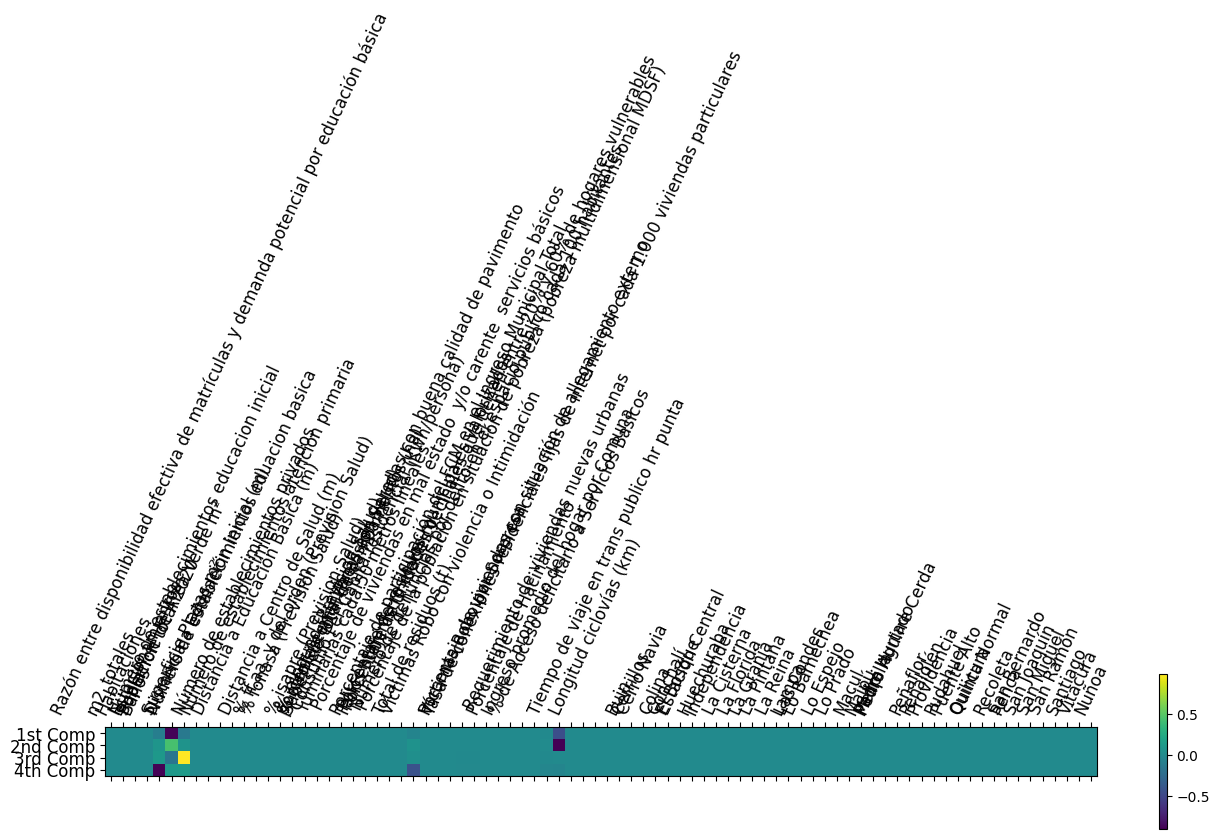

In [170]:
#plt.figure(figsize=(20,20))
plt.matshow(model_pca.components_[0:4], cmap='viridis')
plt.yticks([0,1,2,3,],['1st Comp','2nd Comp','3rd Comp','4th Comp',], fontsize=12)
plt.colorbar()
plt.xticks(range(len(X.columns)), X.columns, fontsize=12, rotation = 65)
plt.show();

In [ ]:
# podemos ver que tanto el escalado como el pipeline emperora el resultado

In [182]:
pipeline = Pipeline([('scaler',StandardScaler()),("pca",PCA(n_components=4)), ('regressor', XGBRegressor())])
pipeline.fit(X_train, y_train)


r2_train=pipeline.score(X_train, y_train)
print(f"GBR_train: {r2_train}")

r2 = pipeline.score(X_test, y_test)
print(f"GBR_test: {r2}")

GBR_train: 0.9292280124173059
GBR_test: 0.8965347261641179


# Vamos aplicar un Pipeline y GridSearchCV al segundo mejor modelo XGB

In [184]:
from sklearn.model_selection import GridSearchCV

In [185]:
pipe = Pipeline(steps=[
    ("scaler", StandardScaler()),# este metodo sirve para escalar los datos 
    ('regressor', LinearRegression()) 
    
])


xgboost_params = {
    'regressor': [XGBRegressor()],
    'regressor__max_depth': [3,4,5,6],
    'regressor__n_estimators': [40,50,60,80,100, 120]

}


search_space = [
  
    xgboost_params,
]

clf_b = GridSearchCV(estimator = pipe,
                  param_grid = search_space,
                  cv = 5)

clf_b.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('regressor', LinearRegression())]),
             param_grid=[{'regressor': [XGBRegressor(base_score=None,
                                                     booster=None,
                                                     callbacks=None,
                                                     colsample_bylevel=None,
                                                     colsample_bynode=None,
                                                     colsample_bytree=None,
                                                     early_stopping_rounds=None,
                                                     enable_categorical=False,
                                                     eval_metric=None,
                                                     feature_types=None,
                                                     gamma...
                                                     learning_rate=None,
                                                     max_bin=None,
                                                     max_cat_threshold=None,
                                                     max_cat_to_onehot=None,
                                                     max_delta_step=None,
                                                     max_depth=4,
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     n_estimators=60,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     predictor=None,
                                                     random_state=None, ...)],
                          'regressor__max_depth': [3, 4, 5, 6],
                          'regressor__n_estimators': [40, 50, 60, 80, 100,
                                                      120]}])

In [186]:
from sklearn import metrics
print(clf_b.best_estimator_)
print(clf_b.best_score_) # 0,76
print(clf_b.best_params_)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor',
                 XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=0, gpu_id=-1,
                              grow_policy='depthwise', importance_type=None,
                              interaction_constraints='',
                              learning_rate=0.300000012, max_bin=256,
                              max_cat_threshold=64, max_cat_to_onehot=4,
                              max_delta_step=0, max_depth=4, max_leaves=0,
                              min_child_weight=1, missing=nan,
                              monotone_constraints='()', n_estimators=60,
                              n_jobs=0, num_parallel_tree=1, 

 ## GridSearchCV sin pipeline XGB

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [189]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = seed)


XGB =XGBRegressor()
parameters = {'learning_rate': [0.01,0.02,0.03,0.04], #tasa_de_aprendizaje
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],#submuestra
                  'n_estimators' : [40,50,60,80,100],
                  'max_depth'    : [3,4,5,6,8]# profundidad
                 }

In [190]:
grid_XGB = GridSearchCV(estimator= XGB,  # estuviemos copando mas modelos aqui deberiamos incluirlos
                        param_grid = parameters,  # aqui van los parametros de los modelos utilizados
                        cv = 3,    #  cross validation 
                        n_jobs=-1) # Esto significa la cantidad de trabajos que se ejecutarán en paralelo, -1 significa usar todo el procesador.

grid_XGB.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'max_depth': [3, 4, 5, 6, 8],
                         'n_estimators': [40, 50, 60, 80, 100],
                         'subsample': [0.9, 0.5, 0.2, 0.1]})

In [191]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_XGB.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_XGB.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_XGB.best_params_)
  

 Results from Grid Search 

 The best estimator across ALL searched params:
 XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.04, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=8, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

 The best score across ALL searched params:
 0.8766556395031889

 The best parameters across ALL searched params:
 {'learning_rate': 0.04, 'max_depth': 8, 'n_estimators': 100, 'subsample': 0.9}


In [194]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = seed)


XGB =XGBRegressor()
parameters = {'learning_rate': [0.01,0.02,0.03,0.04], #tasa_de_aprendizaje
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],#submuestra
                  'n_estimators' : [120,220,320],
                  'max_depth'    : [3,4,5,6,8]# profundidad
                 }

In [195]:
grid_XGB = GridSearchCV(estimator= XGB,  # estuviemos copando mas modelos aqui deberiamos incluirlos
                        param_grid = parameters,  # aqui van los parametros de los modelos utilizados
                        cv = 3,    #  cross validation 
                        n_jobs=-1) # Esto significa la cantidad de trabajos que se ejecutarán en paralelo, -1 significa usar todo el procesador.

grid_XGB.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'max_depth': [3, 4, 5, 6, 8],
                         'n_estimators': [120, 220, 320],
                         'subsample': [0.9, 0.5, 0.2, 0.1]})

In [196]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_XGB.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_XGB.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_XGB.best_params_)
  

 Results from Grid Search 

 The best estimator across ALL searched params:
 XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.04, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=220, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

 The best score across ALL searched params:
 0.9188589060847513

 The best parameters across ALL searched params:
 {'learning_rate': 0.04, 'max_depth': 6, 'n_estimators': 220, 'subsample': 0.9}


___
___
___

## PCA & Pipeline al mejor modelo  Bosting_regressor

In [197]:
pipeline = Pipeline([('scaler',StandardScaler()), ('regressor', GradientBoostingRegressor())])
pipeline.fit(X_train, y_train)


r2_train=pipeline.score(X_train, y_train)
print(f"GBR_train: {r2_train}")

r2 = pipeline.score(X_test, y_test)
print(f"GBR_test: {r2}")

GBR_train: 0.9258036212702814
GBR_test: 0.9167199202419531


# Vamos aplicar un Pipeline y GridSearchCV Bosting_regressor

In [198]:
pipe = Pipeline(steps=[
    ("scaler", StandardScaler()),# este metodo sirve para escalar los datos 
    ('regressor', LinearRegression()) 
])


bosting_ressor_params = {
    'regressor': [GradientBoostingRegressor()],
    'regressor__max_depth': [3,4,5,6,7,8],
    'regressor__n_estimators': [220,240,260,280]
}


search_space = [
  
    bosting_ressor_params,
]

clf_b = GridSearchCV(estimator = pipe,
                  param_grid = search_space,
                  cv = 3)

clf_b.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('regressor', LinearRegression())]),
             param_grid=[{'regressor': [GradientBoostingRegressor(max_depth=4,
                                                                  n_estimators=220)],
                          'regressor__max_depth': [3, 4, 5, 6, 7, 8],
                          'regressor__n_estimators': [220, 240, 260, 280]}])

In [199]:
from sklearn import metrics
print(clf_b.best_estimator_)
print(clf_b.best_score_) # 0,76
print(clf_b.best_params_)


Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor',
                 GradientBoostingRegressor(max_depth=4, n_estimators=220))])
0.9174871487857604
{'regressor': GradientBoostingRegressor(max_depth=4, n_estimators=220), 'regressor__max_depth': 4, 'regressor__n_estimators': 220}


In [200]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_XGB.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_XGB.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_XGB.best_params_)
  

 Results from Grid Search 

 The best estimator across ALL searched params:
 XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.04, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=220, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

 The best score across ALL searched params:
 0.9188589060847513

 The best parameters across ALL searched params:
 {'learning_rate': 0.04, 'max_depth': 6, 'n_estimators': 220, 'subsample': 0.9}


In [ ]:
## vamos a modificar los parametros entre 300 y 380, recordar que el mejor resultado es con 300 a pelo

In [201]:
pipe = Pipeline(steps=[
    ("scaler", StandardScaler()),# este metodo sirve para escalar los datos 
    ('regressor', LinearRegression()) 
])


bosting_ressor_params = {
    'regressor': [GradientBoostingRegressor()],
    'regressor__max_depth': [3,4,5,6,7,8],
    'regressor__n_estimators': [300,320,360,380]
}


search_space = [
  
    bosting_ressor_params,
]

clf_b = GridSearchCV(estimator = pipe,
                  param_grid = search_space,
                  cv = 3)

clf_b.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('regressor', LinearRegression())]),
             param_grid=[{'regressor': [GradientBoostingRegressor(max_depth=4,
                                                                  n_estimators=320)],
                          'regressor__max_depth': [3, 4, 5, 6, 7, 8],
                          'regressor__n_estimators': [300, 320, 360, 380]}])

In [202]:
from sklearn import metrics
print(clf_b.best_estimator_)
print(clf_b.best_score_) # 0,76
print(clf_b.best_params_)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor',
                 GradientBoostingRegressor(max_depth=4, n_estimators=320))])
0.9169863255511735
{'regressor': GradientBoostingRegressor(max_depth=4, n_estimators=320), 'regressor__max_depth': 4, 'regressor__n_estimators': 320}


 # GridSearchCV sin pipeline

In [203]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

In [204]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = seed)


GBR = GradientBoostingRegressor()
parameters = {'learning_rate': [0.01,0.02,0.03,0.04], #tasa_de_aprendizaje
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],#submuestra
                  'n_estimators' : [300,350,400],
                  'max_depth'    : [3,4,5,6,8,]# profundidad
                 }

In [205]:
grid_GBR = GridSearchCV(estimator=GBR,  # estuvimos copiando mas modelos aqui deberiamos incluirlos
                        param_grid = parameters,  # aqui van los parametros de los modelos utilizados
                        cv = 3,    #  cross validation 
                        n_jobs=-1) # Esto significa la cantidad de trabajos que se ejecutarán en paralelo, -1 significa usar todo el procesador.

grid_GBR.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'max_depth': [3, 4, 5, 6, 8],
                         'n_estimators': [300, 350, 400],
                         'subsample': [0.9, 0.5, 0.2, 0.1]})

In [206]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)
  

 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(learning_rate=0.02, max_depth=5, n_estimators=300,
                          subsample=0.5)

 The best score across ALL searched params:
 0.9194951519141871

 The best parameters across ALL searched params:
 {'learning_rate': 0.02, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.5}


In [207]:
## vamos a modificar los parametros entre 300 y 400

In [208]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = seed)


GBR = GradientBoostingRegressor()
parameters = {'learning_rate': [0.01,0.02,0.03,0.04], #tasa_de_aprendizaje
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],#submuestra
                  'n_estimators' : [320,340,360,380],
                  'max_depth'    : [3,4,5,6,8,]# profundidad
                 }

In [209]:
grid_GBR = GridSearchCV(estimator=GBR,  # estuvimos copiando mas modelos aqui deberiamos incluirlos
                        param_grid = parameters,  # aqui van los parametros de los modelos utilizados
                        cv = 3,    #  cross validation 
                        n_jobs=-1) # Esto significa la cantidad de trabajos que se ejecutarán en paralelo, -1 significa usar todo el procesador.

grid_GBR.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'max_depth': [3, 4, 5, 6, 8],
                         'n_estimators': [320, 340, 360, 380],
                         'subsample': [0.9, 0.5, 0.2, 0.1]})

In [210]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(learning_rate=0.02, max_depth=6, n_estimators=340,
                          subsample=0.5)

 The best score across ALL searched params:
 0.9196109202585854

 The best parameters across ALL searched params:
 {'learning_rate': 0.02, 'max_depth': 6, 'n_estimators': 340, 'subsample': 0.5}
